In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import sys

sys.path.append(os.getcwd() + '/../../')

import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [2]:
experiment = "01_Multiplication" # 506
experiment = "02_Compare" # 507|508|509
# experiment = "03_Share"
experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
# framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

data = []
base = "../../Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [3]:
import pandas as pd


In [4]:
# fl_paths[-1].split("/")[-2]

In [5]:
# runtime/3600

mean bandwidths(Mbs)
100      0.100
1000     1.659
10000    1.387
25000    1.203
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.094000
1000     1.546000
10000    1.170000
25000    0.980333
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.110
1000     0.791
10000    1.159
25000    1.307
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      109.774
1000     115.808
10000    106.246
25000    118.222
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      111.768
1000     109.893
10000    114.136
25000    112.307
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      112.927
1000     103.727
10000    118.458
25000    101.897
Name: runtime_external(s), dtype: float64
300
mean bandwidths(Mbs)
100      8.2940
1000     4.5960
10000    4.3480
25000    4.1428
Name: runtime_external(s), dtype: float64
300
mean bandwidths(Mbs)
100      109.442000
1000      36.357000
10000     29.095000
25000     

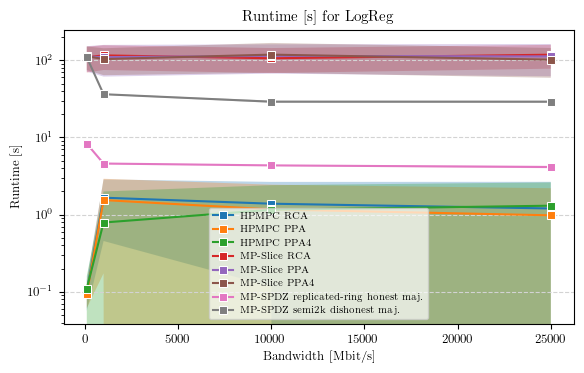

In [6]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[-2]
# del label[-2]
# label = ['HPMPC',
#          'mp-slice RCA',
#          'mp-slice PPA',
#          'mp-slice PPA4',
#          'MP-SPDZ replicated-ring honest maj.',
#          'MP-SPDZ semi2k dishonest maj.']

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

label = ['HPMPC RCA', 'HPMPC PPA', 'HPMPC PPA4', 'MP-Slice RCA', 'MP-Slice PPA', 'MP-Slice PPA4', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ semi2k dishonest maj.']

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

mean Series([], Name: runtime_external(s), dtype: float64)
mean latencies(ms)
0      1.203
25    15.197
50    30.272
75    45.347
Name: runtime_external(s), dtype: float64
mean Series([], Name: runtime_external(s), dtype: float64)
mean latencies(ms)
0      0.980333
25    15.197000
50    30.275000
75    45.349000
Name: runtime_external(s), dtype: float64
mean Series([], Name: runtime_external(s), dtype: float64)
mean latencies(ms)
0      1.307
25    15.201
50    30.270
75    45.352
Name: runtime_external(s), dtype: float64
mean latencies(ms)
0    118.222
Name: runtime_external(s), dtype: float64
mean latencies(ms)
0    112.307
Name: runtime_external(s), dtype: float64
mean latencies(ms)
0    101.897
Name: runtime_external(s), dtype: float64
300
mean latencies(ms)
0       4.1428
25    268.0050
50    529.7510
75    791.4610
Name: runtime_external(s), dtype: float64
300
mean latencies(ms)
0      29.074667
25    109.878000
50    215.810000
75    324.805000
Name: runtime_external(s), dtype: 

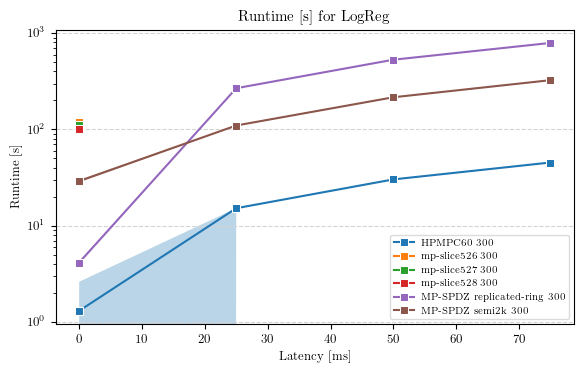

In [7]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del latency[-1]
# del label[-2]
# del latency[-2]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

del latency[-7] # LogReg
del latency[-7]
del latency[-7]
del latency[-7]
del latency[-7]
del label[-7]
del label[-7]
del label[-7]
del label[-7]
del label[-7]
# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

mean packetdrops(%)
0.0     1.203
1.0     3.061
2.0     5.731
5.0    13.054
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0.0     0.980333
1.0     3.710000
2.0     6.979000
5.0    12.856000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0.0     1.307
1.0     3.212
2.0     5.835
5.0    14.665
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    118.222
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    112.307
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    101.897
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0      4.1428
1     97.0870
2    148.5350
5    338.0120
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0     29.074667
1     40.645000
2     50.672000
5    103.938000
Name: runtime_external(s), dtype: float64


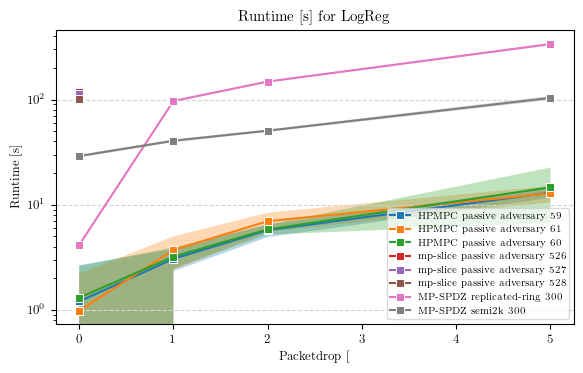

In [8]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[0] # AUCTION
# del packetdrop[1]
# del packetdrop[2]
# del packetdrop[-2]
# del packetdrop[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del packetdrop[-1]
# del label[-2]
# del packetdrop[-2]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]
# print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [%]","Runtime [s]",True)

In [9]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # Division
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]
[df['mean'].iloc[0] for df in bandwidth]

mean bandwidths(Mbs)
100      0.100
1000     1.659
10000    1.387
25000    1.203
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.094000
1000     1.546000
10000    1.170000
25000    0.980333
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.110
1000     0.791
10000    1.159
25000    1.307
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      109.774
1000     115.808
10000    106.246
25000    118.222
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      111.768
1000     109.893
10000    114.136
25000    112.307
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      112.927
1000     103.727
10000    118.458
25000    101.897
Name: runtime_external(s), dtype: float64
300
mean bandwidths(Mbs)
100      8.2940
1000     4.5960
10000    4.3480
25000    4.1428
Name: runtime_external(s), dtype: float64
300
mean bandwidths(Mbs)
100      109.442000
1000      36.357000
10000     29.095000
25000     

[0.1,
 0.094,
 0.11000000000000001,
 109.774,
 111.768,
 112.92699999999999,
 8.294,
 109.44200000000001]

In [10]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.04320493798938573,
 0.03238655413730965,
 0.050332229568471665,
 40.34707925543613,
 40.422055255900965,
 38.47829028599547,
 0.08324662155307035,
 0.9454311185908816]

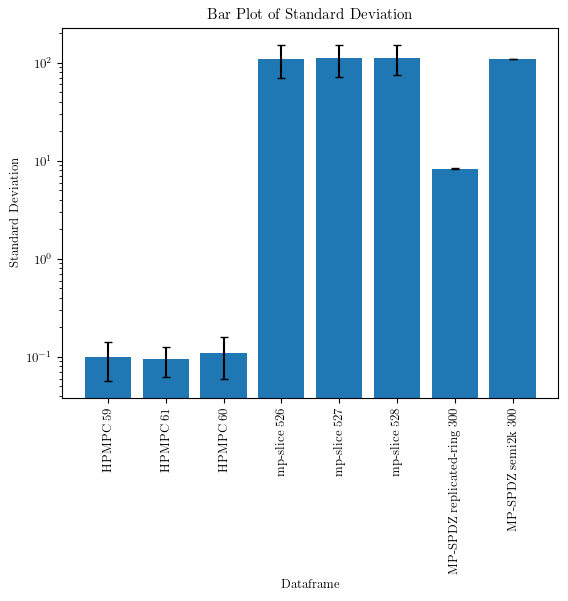

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


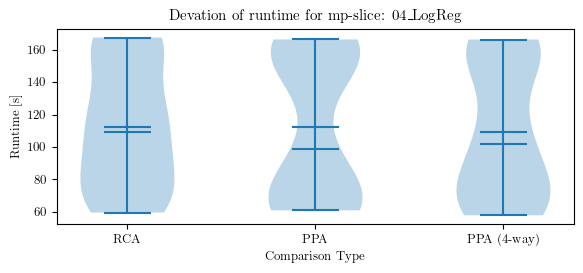

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example data
fig, ax = plt.subplots()

pos = 1
deviation61 = data[pos].loc[(data[pos]['function'] == 526) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation62 = data[pos].loc[(data[pos]['function'] == 527)  & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation63 = data[pos].loc[(data[pos]['function'] == 528) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()

# Plot the first violin plot
two_dimensional_list = [deviation61, deviation62, deviation63]
ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# Set the x-tick labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])


# Set plot title and labels
plt.title(f"Devation of runtime for {framworks[pos]}: {experiment}")
plt.xlabel("Comparison Type")
plt.ylabel("Runtime [s]")
ax.figure.set_size_inches(5.91, 2.8)
fig.tight_layout()
# plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
plt.show()